In [8]:
import midi
from scipy.io import wavfile
import numpy as np
import librosa
import matplotlib.pyplot as plt
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
%matplotlib inline

In [9]:
# load sound file
pcm, sr = librosa.load('sound/vs1-4prs.wav', sr=44100)
# load vectors
vec_data = np.load('vectors/vs1-4prs.npz')
bpm,vectors = int(vec_data['arr_0']), vec_data['arr_2']

(128, 3266)


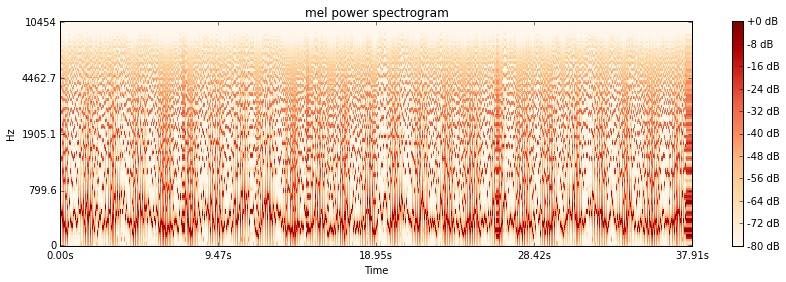

In [10]:
# Take mel spectrogram.
# I want to set hop_length to split the audio into the same number of pieces as my number of vectors
S = librosa.feature.melspectrogram(pcm, sr=sr, hop_length=(len(pcm)/len(vectors))+1, n_mels=128)
print S.shape
# The following code is fully plagiarized from the librosa introductory ipython notebook
# you can find it at http://nbviewer.jupyter.org/github/bmcfee/librosa/blob/master/examples/LibROSA%20demo.ipynb
log_S = librosa.logamplitude(S, ref_power=np.max)
plt.figure(figsize=(12,4))
librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')
plt.title('mel power spectrogram')
plt.colorbar(format='%+02.0f dB')
plt.tight_layout()

In [4]:
# now S[:,i] corresponds to vectors[i,:]
X, y_true = S.transpose(), vectors
# now X[i,:] corresponds to y_true[i,:]
# the following is plagiarized from sklearn docs 
# You can find it at http://scikit-learn.org/stable/modules/multiclass.html#one-vs-the-rest
clf = OneVsRestClassifier(LinearSVC(random_state=0)).fit(X, y_true)
y_pred = clf.predict(X)
# this throws a bunch of errors that i just ignored

/home/skank/envs/sci/local/lib/python2.7/site-packages/sklearn/multiclass.py:70: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))
/home/skank/envs/sci/local/lib/python2.7/site-packages/sklearn/multiclass.py:70: UserWarning: Label not 1 is present in all training examples.
  str(classes[c]))
/home/skank/envs/sci/local/lib/python2.7/site-packages/sklearn/multiclass.py:70: UserWarning: Label not 2 is present in all training examples.
  str(classes[c]))
/home/skank/envs/sci/local/lib/python2.7/site-packages/sklearn/multiclass.py:70: UserWarning: Label not 3 is present in all training examples.
  str(classes[c]))
/home/skank/envs/sci/local/lib/python2.7/site-packages/sklearn/multiclass.py:70: UserWarning: Label not 4 is present in all training examples.
  str(classes[c]))
/home/skank/envs/sci/local/lib/python2.7/site-packages/sklearn/multiclass.py:70: UserWarning: Label not 5 is present in all training examples.
  str(classes[c]))
/home/skank/envs/sci/local/l

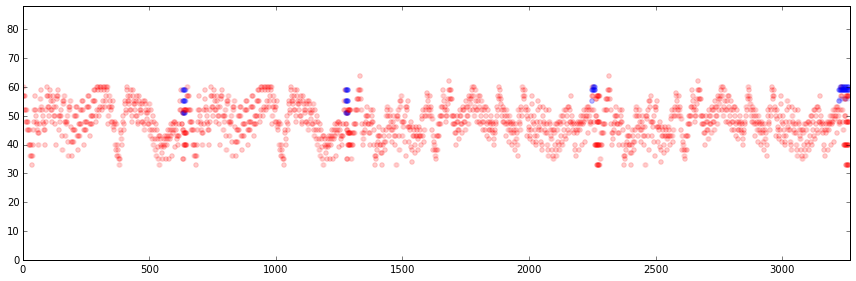

In [5]:
# plot results
plt.clf()
plt.figure(figsize=(12,4))
for i, (pr, tr) in enumerate(zip(y_pred, y_true)):
    pr_notes, tr_notes = np.nonzero(pr)[0], np.nonzero(tr)[0]
    if pr_notes.size != 0:
        plt.scatter([i]*len(pr_notes), pr_notes, color='blue', alpha=0.1)
    if tr_notes.size != 0:
        plt.scatter([i]*len(tr_notes), tr_notes, color='red', alpha=0.1)
    # plot predictions in blue, ground truth in red
plt.axis([0, len(vectors), 0, 88])
plt.tight_layout()

Clearly this doesn't work very well.  Feel free to try to fix it!

Next step: try nonnegative matrix decomposition.  I'll start with scikit-learn's implementation.

In [6]:
from sklearn.decomposition import NMF
model = NMF(n_components=5,init='random', random_state=0)
W = model.fit_transform(S);
H = model.components_;
#rows of H are when the notes are hit, and the columns of W are what frequency the beats are

In [10]:
H.shape, W.shape, S.shape

((5, 3266), (128, 5), (128, 3266))

In [12]:
W[:,0].shape

(128,)